In [43]:
import datetime as dt
import pandas as pd
import pandas_datareader as web
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM


In [13]:
start

datetime.datetime(2012, 1, 1, 0, 0)

In [28]:
company = '^TNX'
start = dt.datetime(2012,1,1)
end = dt.datetime(2020,1,1)

data = web.DataReader(company, 'yahoo', start=start, end=end)


In [29]:
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,1.965,1.914,1.951,1.960,0.0,1.960
2012-01-04,2.012,1.933,1.937,1.995,0.0,1.995
2012-01-05,2.021,1.944,1.991,1.993,0.0,1.993
2012-01-06,2.044,1.946,2.003,1.961,0.0,1.961
2012-01-09,1.986,1.919,1.975,1.960,0.0,1.960
...,...,...,...,...,...,...
2019-12-26,1.921,1.896,1.912,1.905,0.0,1.905
2019-12-27,1.893,1.870,1.893,1.874,0.0,1.874
2019-12-30,1.940,1.895,1.923,1.895,0.0,1.895


In [30]:
#Prepare Data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

prediction_days = 60

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0 ])
    y_train.append(scaled_data[x,0])


x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
x_train

In [31]:
# Build the Model

model = Sequential ()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))


model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)




Epoch 1/25
61/61 [==============================] - 13s 45ms/step - loss: 0.0292
Epoch 2/25
61/61 [==============================] - 3s 46ms/step - loss: 0.0067
Epoch 3/25
61/61 [==============================] - 3s 42ms/step - loss: 0.0066
Epoch 4/25
61/61 [==============================] - 3s 43ms/step - loss: 0.0055
Epoch 5/25
61/61 [==============================] - 3s 43ms/step - loss: 0.0064
Epoch 6/25
61/61 [==============================] - 3s 42ms/step - loss: 0.0053
Epoch 7/25
61/61 [==============================] - 3s 41ms/step - loss: 0.0050
Epoch 8/25
61/61 [==============================] - 3s 44ms/step - loss: 0.0048
Epoch 9/25
61/61 [==============================] - 3s 42ms/step - loss: 0.0045
Epoch 10/25
61/61 [==============================] - 3s 42ms/step - loss: 0.0044
Epoch 11/25
61/61 [==============================] - 3s 41ms/step - loss: 0.0044
Epoch 12/25
61/61 [==============================] - 3s 41ms/step - loss: 0.0043
Epoch 13/25
61/61 [=================

ValueError: Expected 2D array, got 1D array instead:
array=[1.53699994 1.58899999 1.65799999 1.75199997 1.73300004 1.77100003
 1.74800003 1.75699997 1.74699998 1.79200006 1.76800001 1.75899994
 1.76600003 1.801      1.85300004 1.83500004 1.79799998 1.69099998
 1.72800004 1.78600001 1.86600006 1.81400001 1.926      1.93299997
 1.94299996 1.90900004 1.87       1.81500006 1.83399999 1.80799997
 1.78600001 1.73800004 1.77199996 1.77400005 1.76400006 1.74000001
 1.76699996 1.77600002 1.83599997 1.70899999 1.78100002 1.79700005
 1.84200001 1.829      1.83299994 1.78999996 1.89699996 1.81900001
 1.89199996 1.88900006 1.92400002 1.90799999 1.91700006 1.93499994
 1.90999997 1.90499997 1.87399995 1.89499998 1.91900003 1.88199997
 1.88199997 1.78799999 1.81099999 1.82700002 1.87399995 1.85800004
 1.82500005 1.84800005 1.81799996 1.78799999 1.80900002 1.83599997
 1.76900005 1.76900005 1.74000001 1.68099999 1.60500002 1.64100003
 1.59399998 1.55799997 1.51999998 1.51999998 1.60300004 1.64900005
 1.64400005 1.57799995 1.54700005 1.59000003 1.63       1.61699998
 1.58800006 1.55599999 1.57000005 1.52499998 1.47099996 1.37699997
 1.33000004 1.30999994 1.29900002 1.12699997 1.08800006 1.00999999
 0.99199998 0.926      0.70599997 0.49900001 0.74800003 0.81999999
 0.84899998 0.95099998 0.72799999 0.99699998 1.26600003 1.11899996
 0.93800002 0.764      0.81599998 0.85799998 0.81099999 0.74900001
 0.67000002 0.69800001 0.63499999 0.62699997 0.58700001 0.676
 0.736      0.764      0.72899997 0.74900001 0.75199997 0.63800001
 0.60900003 0.65399998 0.62599999 0.57099998 0.61900002 0.61299998
 0.59600002 0.65600002 0.61000001 0.62699997 0.62199998 0.64200002
 0.63700002 0.65700001 0.71100003 0.63099998 0.68199998 0.72600001
 0.67799997 0.64899999 0.61900002 0.63999999 0.74400002 0.71100003
 0.68000001 0.67699999 0.65700001 0.69800001 0.68000001 0.70499998
 0.648      0.662      0.68000001 0.76099998 0.81999999 0.90399998
 0.884      0.829      0.74800003 0.653      0.699      0.70200002
 0.75599998 0.73299998 0.69400001 0.69700003 0.704      0.70899999
 0.68400002 0.67400002 0.63599998 0.63599998 0.653      0.68199998
 0.66900003 0.68400002 0.64999998 0.653      0.60500002 0.63300002
 0.63999999 0.61500001 0.63       0.61199999 0.62800002 0.62
 0.60699999 0.59500003 0.58200002 0.58899999 0.60900003 0.58099997
 0.579      0.54100001 0.53600001 0.56300002 0.51499999 0.54299998
 0.53600001 0.56199998 0.574      0.65799999 0.67000002 0.71600002
 0.70899999 0.68300003 0.66900003 0.67500001 0.64399999 0.63999999
 0.64600003 0.68199998 0.68699998 0.74599999 0.72899997 0.69300002
 0.67199999 0.65100002 0.62199998 0.72100002 0.68400002 0.70300001
 0.685      0.66900003 0.671      0.67900002 0.68699998 0.68400002
 0.69400001 0.671      0.66399997 0.676      0.66600001 0.65899998
 0.66299999 0.64499998 0.67699999 0.67699999 0.69599998 0.76200002
 0.74199998 0.78500003 0.76499999 0.77499998 0.77700001 0.727
 0.722      0.73100001 0.74400002 0.76099998 0.79699999 0.81599998
 0.84799999 0.84100002 0.801      0.778      0.78100002 0.83499998
 0.86000001 0.84899998 0.88200003 0.76800001 0.77600002 0.81999999
 0.958      0.972      0.958      0.88499999 0.89300001 0.90600002
 0.87199998 0.88200003 0.85399997 0.829      0.85699999 0.88200003
 0.87800002 0.84200001 0.84399998 0.93400002 0.94800001 0.92000002
 0.96899998 0.92799997 0.91299999 0.94099998 0.90799999 0.89300001
 0.89200002 0.92299998 0.92000002 0.93000001 0.94800001 0.94099998
 0.91799998 0.95499998 0.92799997 0.93300003 0.935      0.926
 0.917     ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [38]:

#TESTING THE MODEL
test_start = dt.datetime(2020,1,1)
test_end = dt.datetime(2021,1,1)

test_data = web.DataReader(company, 'yahoo', test_start,  test_end)
actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)


model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)


In [40]:

#Make predictions on test data

x_test = []

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0 ])


x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)




8/8 [==============================] - 2s 14ms/step


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


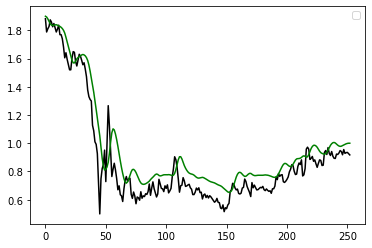

In [44]:


#PLOT

plt.plot(actual_prices, color='black')
plt.plot(predicted_prices, color='green')

plt.legend()
plt.show()
    